In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [2]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df = df.dropna()
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
X = df.drop('BMI', axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,0.627,50,1
1,1,85,66,29,0,0.351,31,0
2,8,183,64,0,0,0.672,32,1
3,1,89,66,23,94,0.167,21,0
4,0,137,40,35,168,2.288,33,1


In [7]:
y = df['BMI']
y.head()

0    33.6
1    26.6
2    23.3
3    28.1
4    43.1
Name: BMI, dtype: float64

In [8]:
y.value_counts()

BMI
32.0    13
31.6    12
31.2    12
0.0     11
32.4    10
        ..
36.7     1
41.8     1
42.6     1
42.8     1
46.3     1
Name: count, Length: 248, dtype: int64

In [9]:
Y = pd.get_dummies(y).values

In [10]:
X = X.values

In [11]:
X

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [12]:
y

0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64

In [13]:
Y

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614, 248), (154, 248))

In [16]:
#Defining the model

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(10, input_shape=(8,),activation='relu'))
model.add(Dense(20, activation='relu'))
# model.add(Dense(40, activation='relu'))
# model.add(Dense(80, activation='relu'))
# model.add(Dense(40, activation='relu'))
# model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(248))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics=['mse'])

model.summary()

/opt/anaconda3/envs/DLvirt/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-01 11:10:14.853763: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2025-04-01 11:10:14.853795: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2025-04-01 11:10:14.853802: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2025-04-01 11:10:14.853819: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-01 11:10:14.853828: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Crea

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │           220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 248)            │         2,728 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,248 (12.69 KB)

 Trainable params: 3,248 (12.69 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
N_EPOCHS = 30

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/40


2025-04-01 11:10:15.215842: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 26.9800 - mse: 26.9800 - val_loss: 7.1068 - val_mse: 7.1068
Epoch 2/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.3436 - mse: 6.3436 - val_loss: 2.3616 - val_mse: 2.3616
Epoch 3/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2090 - mse: 2.2090 - val_loss: 0.7977 - val_mse: 0.7977
Epoch 4/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7304 - mse: 0.7304 - val_loss: 0.2823 - val_mse: 0.2823
Epoch 5/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3327 - mse: 0.3327 - val_loss: 0.1235 - val_mse: 0.1235
Epoch 6/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1149 - mse: 0.1149 - val_loss: 0.0525 - val_mse: 0.0525
Epoch 7/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0652 - mse: 0.0652 - val_loss: 0.0488 - val_mse: 0.0488
Epoch 8/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0421 - mse: 0.0421 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 9/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0254 - mse: 0.0254 -

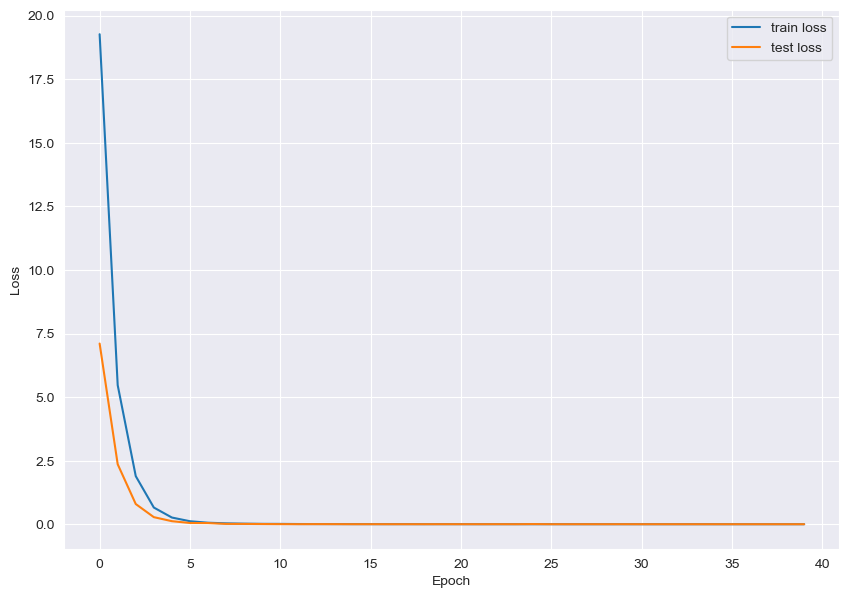

In [18]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()